Machine Learning project

Training a CNN to to classify images. We will be using Keras Sequential API []. Our data set was gathered by us [].

Neccessary imports:

In [92]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

from pathlib import Path
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical




Download data set:

In [93]:
image_data = np.load("image_data64.npy")
labels = np.load("labels64.npy")

Normalization operations n' stuff

Verifying the dataset and displaying some images

In [94]:
# Normalize image data
image_data = image_data.astype('float32') / 255.0

In [95]:
labels_zero_indexed = np.array(labels) - 1  # Convert labels to zero-indexed

# One-hot encode the labels for categorical_crossentropy
y_categorical = to_categorical(labels_zero_indexed)


In [96]:
# Splitting the data


X_train, X_test, y_train, y_test = train_test_split(
    image_data, 
    labels_zero_indexed, #coreesponding labels are the same as for image_data
    test_size = 0.15, #15% for  tests 
    random_state=42, #meaning of life
    stratify=labels
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, # Features
    y_train, # Corresponding labels
    test_size=0.1765, # 20% of training data for validation = 15% of the original data
    random_state=42, 
    stratify=y_train
)

print(f"Training set shape: {X_train.shape}, Training labels shape: {len(y_train)}")
print(f"Validation set shape: {X_val.shape}, Validation labels shape: {len(y_val)}")
print(f"Test set shape: {X_test.shape}, Test labels shape: {len(y_test)}")

Training set shape: (16799, 64, 64, 3), Training labels shape: 16799
Validation set shape: (3601, 64, 64, 3), Validation labels shape: 3601
Test set shape: (3600, 64, 64, 3), Test labels shape: 3600


In [97]:
##code here for it

crafting convolutional base

CNN takes tensors of shape (image_height, image_width, color_channels) = (64, 64, 3)
You can do this by passing the argument input_shape to your first layer.


layers: Conv2D, MaxPooling, Dense



In [98]:
model = Sequential()
model.add(InputLayer(shape=(64,64,3)))

#1st layer
#Conv2d(filters, kernel_size, ) 
# We use padding because it maintains feature map size and doesn't shrink image's spatial dimensions too soon, out put is the same size as input
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
#MaxPool2D(pool_size) reduces width and height by half
model.add(MaxPool2D(pool_size=(2,2)))

#2nd
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

#3rd
#model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(MaxPool2D(pool_size=(2,2)))

#4th
#model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
#model.add(MaxPool2D(pool_size=(2,2)))


In [99]:

#flatten
model.add(Flatten())

# fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

#output Layer 
#softmax activation is udes because in converts the output into a probability distribution accross our classes
model.add(layers.Dense(24, activation='softmax'))


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,194,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           6,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,220,120 (16.10 MB)

 Trainable params: 4,220,120 (16.10 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the model

We will be using Adam optimimizer 

In [100]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [101]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Unique values in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Unique values in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Shape of y_train: (16799,)
Shape of y_test: (3600,)


In [102]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your original integer labels
y_train_encoded = to_categorical(y_train, num_classes=24)
y_test_encoded = to_categorical(y_test, num_classes=24)

print("Shape of y_train_encoded:", y_train_encoded.shape)  # Should be (num_samples, 24)
print("Shape of y_test_encoded:", y_test_encoded.shape)    # Sh

Shape of y_train_encoded: (16799, 24)
Shape of y_test_encoded: (3600, 24)


In [ ]:
history = model.fit(X_train, y_train_encoded, epochs=24, 
                    validation_data=(X_test, y_test_encoded), 
                    batch_size=16)


Epoch 1/24
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 61s 55ms/step - accuracy: 0.3468 - loss: 2.0090 - val_accuracy: 0.7342 - val_loss: 0.6623
Epoch 2/24
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 66s 63ms/step - accuracy: 0.6936 - loss: 0.7957 - val_accuracy: 0.7797 - val_loss: 0.5463
Epoch 3/24
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 59s 57ms/step - accuracy: 0.7550 - loss: 0.6117 - val_accuracy: 0.7661 - val_loss: 0.5395
Epoch 4/24
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - accuracy: 0.7854 - loss: 0.5367 - val_accuracy: 0.8161 - val_loss: 0.4388
Epoch 5/24
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - accuracy: 0.8046 - loss: 0.4842 - val_accuracy: 0.8494 - val_loss: 0.3787
Epoch 6/24
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 60s 57ms/step - accuracy: 0.8318 - loss: 0.4128 - val_accuracy: 0.8183 - val_loss: 0.4172
Epoch 7/24
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 58s 55ms/step - accuracy: 0.8337 - loss: 0.4008 - val_accuracy: 0.8644 - val_loss: 0.3390
Epoch 8/24
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 66s 62ms/step - accuracy: 0.8615 -

Evaluate the model

In [ ]:


# Extracting training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# training and validation metrics at the end of training
final_train_loss = train_loss[-1]
final_val_loss = val_loss[-1]
final_train_accuracy = train_accuracy[-1]
final_val_accuracy = val_accuracy[-1]

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


113/113 - 3s - 28ms/step - accuracy: 0.8722 - loss: 0.3461

Test accuracy: 0.8722222447395325


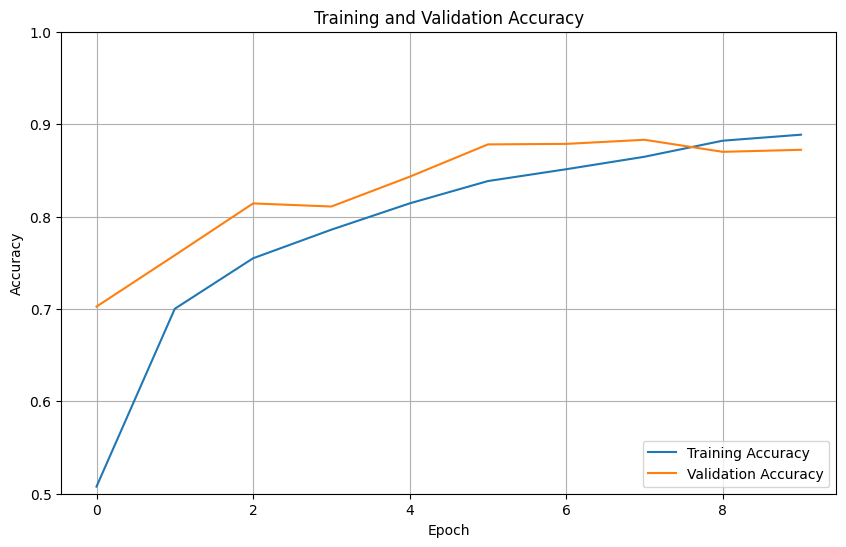

113/113 - 3s - 24ms/step - accuracy: 0.8722 - loss: 0.3461
Test accuracy: 0.8722


In [88]:
y_test_encoded = to_categorical(y_test, num_classes=24)

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))  # Set figure size for better readability
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=2)

# Print the test accuracy
print(f'Test accuracy: {test_acc:.4f}')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming your model is already trained and you have predictions
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels (assuming y_test_encoded is one-hot encoded)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Calculate confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

print("Confusion Matrix:")
print(confusion_mtx)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes)

print("Classification Report:")
print(report)

# Print additional metrics like accuracy, precision, recall, and F1 score
accuracy = np.sum(y_pred_classes == y_true_classes) / len(y_true_classes)
precision = np.sum(y_pred_classes[y_pred_classes == 1] == y_true_classes[y_pred_classes == 1]) / np.sum(y_pred_classes == 1)
recall = np.sum(y_pred_classes[y_true_classes == 1] == y_true_classes[y_true_classes == 1]) / np.sum(y_true_classes == 1)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


In [89]:
tf.keras.backend.clear_session()
